In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "../CP_analysis/"

In [3]:
sessions = pd.read_csv(path + "sessions.csv", index_col=False)
# sessions = pd.read_csv(path + "sessions.csv", index_col=False, nrows=1e6)
sessions.head(5)

,Session ID,Station ID,Port ID,Connector Type,POI Category,POI Subcategory,Station Start Time (Local),Station End Time (Local),Session Time Zone,Session Time (secs),...,City,County,State,Country,Driver City,Driver State,Driver Country,Max Power,Session Type,Vehicle Model Year
0,99999951,155805,208243.0,J1772,Parking,Commercial,2017-09-21 13:50:12.0,2017-09-21 14:59:12.0,PDT,4143,...,Santa Clara,Santa Clara County,California,United States,San Jose,California,United States,6.6,OTHER,2015.0
1,99999911,127071,166451.0,J1772,Workplace,High-Tech,2017-09-21 13:15:01.0,2017-09-21 17:10:05.0,PDT,14104,...,Sunnyvale,Santa Clara County,California,United States,Saratoga,California,United States,6.6,OTHER,2017.0
2,99999881,143745,191547.0,J1772,Workplace,General,2017-09-21 13:50:13.0,2017-09-21 15:02:57.0,PDT,4364,...,Mountain View,Santa Clara County,California,United States,Sunnyvale,California,United States,6.6,OTHER,2013.0
3,99999861,78433,195605.0,J1772,Workplace,General,2017-09-21 13:50:11.0,2017-09-21 16:33:49.0,PDT,9818,...,Santa Clara,Santa Clara County,California,United States,Fremont,California,United States,6.6,OTHER,2015.0
4,99999851,93629,105187.0,J1772,Workplace,General,2017-09-21 13:50:14.0,2017-09-21 15:49:40.0,PDT,7165,...,San Jose,Santa Clara County,California,United States,San Jose,California,United States,6.6,OTHER,2015.0


In [4]:
# print(len(sessions))
# for column in list(sessions):
#     unique = sessions[column].unique()
#     print(column, len(unique))
#     if len(unique) < 25:
#         print(unique)

12442832
Session ID 12442832
Station ID 8756
Port ID 16010
Connector Type 7
['J1772' 'Combo' 'NEMA 5-20R' 'CHAdeMO' nan 'Type 2 Cable' 'Type 2 Socket']
POI Category 13
['Parking' 'Workplace' 'Retail' 'Municipal' 'Fleet' 'Education'
 'Hospitality' 'Government (Fed, State)' 'Parks and Recreation'
 'Healthcare' 'Multifamily Commercial' 'Multifamily Home Service'
 'Utility']
POI Subcategory 37
Station Start Time (Local) 10561876
Station End Time (Local) 10768393
Session Time Zone 10
['PDT' 'PST' 'MDT' 'EDT' 'UTC' 'MST' 'EST' 'IST' 'CST' 'MHT']
Session Time (secs) 156753
Charging Time (secs) 52579
Start SoC 102
End SoC 102
Full Charge 2
[False  True]
Energy (kWh) 8783406
Driver ID 121548
Driver Zip 3694
Vehicle Make 32
Vehicle Model 82
Battery Capacity 68
EV Type 3
['PLUGIN' nan 'HYBRID']
$ Fee 5471
Fee Currency 5
['USD' 'CAD' 'EUR' 'MXN' nan]
Zip Code 232
City 123
County 9
['Santa Clara County' 'San Mateo County' 'Alameda County'
 'San Francisco County' 'Contra Costa County' 'Napa County' 

In [4]:
sessions = sessions[sessions['Session Type'] != 'FLEET']


In [11]:
col = 'slack_time'
sessions[col] = sessions['Session Time (secs)'] - sessions['Charging Time (secs)']

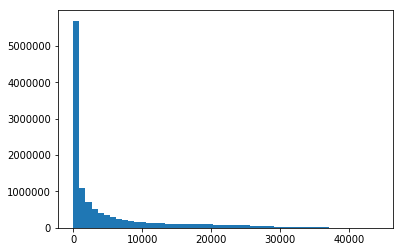

In [15]:
col = 'slack_time'
df = sessions.copy(deep=True)

df = df[df[col] < np.percentile(df[col], 99)]
df = df[df[col] > 0]
plot = plt.hist(df[col], bins=50)

In [16]:
df = sessions.copy(deep=True)
df = df.groupby('Port ID', as_index=False)
df = df.agg('median')

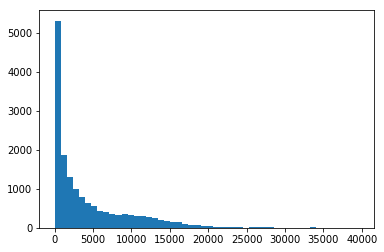

In [19]:
# df
plot = plt.hist(df[col], bins=50)

In [20]:
column = "Port ID"
top_stations_100 = sessions[column].value_counts().head(100)
print(top_stations_100.head(10))
# print(len(sessions[column].unique()))

183101.0    12522
224953.0    10575
194645.0     9900
179993.0     8930
222923.0     8267
194747.0     8193
79119.0      7897
198169.0     7832
195085.0     7823
194143.0     7659
Name: Port ID, dtype: int64


In [21]:
column = "Port ID"
sessions_stations_100 = sessions[sessions[column].apply(lambda x: x in top_stations_100)]
column = "City"
print(sessions_stations_100[column].value_counts().head(10))

Palo Alto        109677
Milpitas          75580
San Jose          61614
Fremont           55603
Cupertino         34520
San Mateo         33613
Menlo Park        28406
Oakland           20877
San Francisco     16916
Campbell          12522
Name: City, dtype: int64


In [27]:
sessions['year'] = sessions["Station Start Time (Local)"].apply(lambda x: int(x[:4]))
# print(sessions['year'].head(20))
print(sessions['year'].value_counts())

2018    4146598
2017    3858204
2016    2894856
2015    1343852
Name: year, dtype: int64


In [28]:
sessions_1718 = sessions[sessions['year'].apply(lambda x: x in [2017, 2018])]
print(sessions_1718["County"].value_counts().head(10))
sessions_sc = sessions_1718[sessions_1718["County"] == "Santa Clara County"]
sessions_sc = sessions_sc[sessions_sc["POI Category"] == "Workplace"]

Santa Clara County      5248541
San Mateo County        1218251
Alameda County           636957
Contra Costa County      289272
San Francisco County     255355
Marin County             163942
Sonoma County            132297
Napa County               33399
Solano County             26788
Name: County, dtype: int64


In [29]:
sessions_sc['Station Start Time (Local)'] = sessions_sc['Station Start Time (Local)'].apply(
    lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f"))
sessions_sc = sessions_sc.sort_values(['Station Start Time (Local)']) 

In [38]:
# top 10
column = "Port ID"
top_sc_10 = sessions_sc[column].value_counts().head(10)
print(top_sc_10)
print(list(top_sc_10.index))
top_sc_10 = list(top_sc_10.index)

194645.0    8208
183101.0    7989
194747.0    7355
179993.0    6932
222923.0    6827
195085.0    6744
194143.0    6617
198169.0    6611
212625.0    5124
196099.0    5030
Name: Port ID, dtype: int64
[194645.0, 183101.0, 194747.0, 179993.0, 222923.0, 195085.0, 194143.0, 198169.0, 212625.0, 196099.0]


In [39]:
# top 100
column = "Port ID"
top_sc_100 = sessions_sc[column].value_counts().head(100)
print(top_sc_100.tail(10))
print(list(top_sc_100.index))
top_sc_100 = list(top_sc_100.index)

174681.0    1793
199775.0    1787
526821.0    1786
128451.0    1759
193707.0    1750
174683.0    1749
210131.0    1745
816331.0    1734
141123.0    1730
193709.0    1717
Name: Port ID, dtype: int64
[194645.0, 183101.0, 194747.0, 179993.0, 222923.0, 195085.0, 194143.0, 198169.0, 212625.0, 196099.0, 212627.0, 213473.0, 213475.0, 100565.0, 63053.0, 111303.0, 792271.0, 110103.0, 157275.0, 445701.0, 194295.0, 111305.0, 100695.0, 110051.0, 225425.0, 218915.0, 204349.0, 105399.0, 100641.0, 205055.0, 204347.0, 302112.0, 100715.0, 445691.0, 105397.0, 105631.0, 100153.0, 100693.0, 141495.0, 105819.0, 141493.0, 467401.0, 100713.0, 105623.0, 105629.0, 262095.0, 105817.0, 204015.0, 204017.0, 302110.0, 85119.0, 467391.0, 262093.0, 100151.0, 204113.0, 479601.0, 85121.0, 157289.0, 105621.0, 779931.0, 454361.0, 427181.0, 906571.0, 454351.0, 142391.0, 858331.0, 212469.0, 427171.0, 108101.0, 115817.0, 526831.0, 112937.0, 57249.0, 429691.0, 112939.0, 419551.0, 200251.0, 142911.0, 123779.0, 212467.0, 26464

In [32]:
column = "Port ID"
sessions_sc_10 = sessions_sc[sessions_sc[column].apply(lambda x: x in top_sc_10)]
sessions_sc_100 = sessions_sc[sessions_sc[column].apply(lambda x: x in top_sc_100)]

In [40]:
sessions_sc_10.head(5)

,Session ID,Station ID,Port ID,Connector Type,POI Category,POI Subcategory,Station Start Time (Local),Station End Time (Local),Session Time Zone,Session Time (secs),...,State,Country,Driver City,Driver State,Driver Country,Max Power,Session Type,Vehicle Model Year,year,slack_time
2769125,57467005,158829,212625.0,J1772,Workplace,General,2017-01-01 08:21:42,2017-01-01 09:55:54.0,PST,5650,...,California,United States,Menlo Park,California,United States,6.6,OTHER,2012.0,2017,58
2769018,57469325,158829,212625.0,J1772,Workplace,General,2017-01-01 09:59:32,2017-01-01 11:19:17.0,PST,4789,...,California,United States,Menlo Park,California,United States,6.6,OTHER,2012.0,2017,37
2768899,57471385,124643,183101.0,CHAdeMO,Workplace,High-Tech,2017-01-01 11:12:02,2017-01-01 11:14:27.0,PST,144,...,California,United States,Sunnyvale,California,United States,50.0,OTHER,2015.0,2017,144
2768892,57471455,124643,183101.0,CHAdeMO,Workplace,High-Tech,2017-01-01 11:15:01,2017-01-01 11:38:55.0,PST,1433,...,California,United States,Sunnyvale,California,United States,50.0,OTHER,2015.0,2017,13
2768834,57472251,125537,194143.0,CHAdeMO,Workplace,High-Tech,2017-01-01 11:40:50,2017-01-01 12:08:18.0,PST,1644,...,California,United States,Palo Alto,California,United States,50.0,OTHER,NaN,2017,20


In [34]:
print(len(sessions))
print(len(sessions_sc_100))
print(len(sessions_sc_10))
column = "City"
print(sessions_sc_100[column].value_counts())
print(sessions_sc_10[column].value_counts())

12243510
285654
67437
Milpitas         85336
San Jose         74663
Cupertino        34239
Sunnyvale        30809
Palo Alto        26986
Campbell         14561
Santa Clara       9491
Mountain View     7711
Los Gatos         1858
Name: City, dtype: int64
San Jose     32755
Milpitas     21569
Campbell      7989
Palo Alto     5124
Name: City, dtype: int64


In [41]:
col = 'slack_time'
sessions_sc_100[col] = sessions_sc_100['Session Time (secs)'] - sessions_sc_100['Charging Time (secs)']

/home/ec2-user/anaconda3/envs/eda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


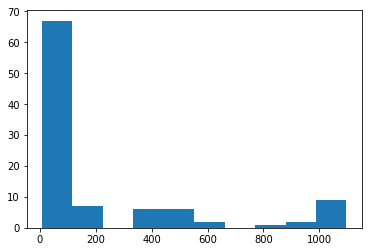

In [47]:
df = sessions_sc_100.copy(deep=True)
df = df.groupby('Port ID', as_index=False)
df = df.agg('median')
plot = plt.hist(df[col], bins=10)

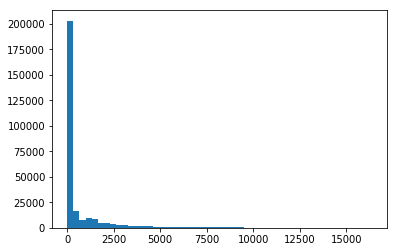

In [50]:
df = sessions_sc_100.copy(deep=True)
df = df[df[col] < np.percentile(df[col], 99)]
df = df[df[col] > 0]
plot = plt.hist(df[col], bins=50)

In [ ]:
keep_cols = ["Station ID", "Energy (kWh)", "Station Start Time (Local)", "Session Time (secs)"]
keep_cols = keep_cols + ["Driver ID", "Battery Capacity", "City", "County"]

In [ ]:
sessions_sc_10[keep_cols].to_csv(path + "sessions_1718_sc_top10.csv", index=False)
sessions_sc_100[keep_cols].to_csv(path + "sessions_1718_sc_top100.csv", index=False)